# Introducción

Además del cálculo, una de las herramientas matemáticas fundamentales para la física es el álgebra lineal, cuyos objetos principales de estudio son los vectores y las matrices. En la sesión de esta semana veremos como trabajar con estas en $\texttt{python}$, tanto de manera simbólica como numérica. Haremos énfasis principalmente en la obtención de los autovalores y autovectores de una matriz, y lo aplicaremos a la resolución de problemas en mecánica cuántica y oscilaciones.

# Matrices simbólicas

La manera más sencilla de definir una matriz es como un arreglo (en general) rectangular de números, por ejemplo

$$
A = \left(
\begin{matrix}
-2 & -4 & 2 \\
-2 & 1 & 2 \\
4 & 2 & 5
\end{matrix}
\right).
$$

Para definir esta matriz de manera simbólica usamos el paquete $\texttt{sympy}$, en particular, el comando $\texttt{Matrix}$

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
A = sp.Matrix([[-2, -4, 2], 
               [-2, 1, 2],
               [4, 2, 5]])

A

⎡-2  -4  2⎤
⎢         ⎥
⎢-2  1   2⎥
⎢         ⎥
⎣4   2   5⎦

In [10]:
B = sp.Matrix([[1-sp.I, 4, sp.Rational(1,2)], # sp.Rational(numerador,denominador): para que muestre una fracción
               [0, -1*sp.I, 2], 
               [1, 2, 5]])

B

⎡1 - ⅈ  4   1/2⎤
⎢              ⎥
⎢  0    -ⅈ   2 ⎥
⎢              ⎥
⎣  1    2    5 ⎦

In [11]:
B[0,0] #como en numpy

$\texttt{sp.I} = i$, la unidad imaginaria

## Operaciones básicas

*Nota:* Antes de realizar alguna operación, verificar siempre que las matrices tengan las dimensiones adecuadas. Caso contrario, $\texttt{python}$ dará un error.

Suma 

In [12]:
A + B

⎡-1 - ⅈ    0    5/2⎤
⎢                  ⎥
⎢  -2    1 - ⅈ   4 ⎥
⎢                  ⎥
⎣  5       4    10 ⎦

Resta

In [13]:
A - B

⎡-3 + ⅈ   -8    3/2⎤
⎢                  ⎥
⎢  -2    1 + ⅈ   0 ⎥
⎢                  ⎥
⎣  3       0     0 ⎦

Multiplicación por un escalar

In [14]:
0.3*A

⎡-0.6  -1.2  0.6⎤
⎢               ⎥
⎢-0.6  0.3   0.6⎥
⎢               ⎥
⎣1.2   0.6   1.5⎦

In [15]:
sp.Rational(1, 2)*A

⎡-1  -2    1 ⎤
⎢            ⎥
⎢-1  1/2   1 ⎥
⎢            ⎥
⎣2    1   5/2⎦

Multiplicación de matrices

In [16]:
A*B

⎡  2⋅ⅈ    -4 + 4⋅ⅈ  1 ⎤
⎢                     ⎥
⎢  2⋅ⅈ     -4 - ⅈ   11⎥
⎢                     ⎥
⎣9 - 4⋅ⅈ  26 - 2⋅ⅈ  31⎦

Potencia 

In [17]:
#B**2 = B*B
sp.simplify(B**2)

⎡                           ⅈ ⎤
⎢1/2 - 2⋅ⅈ  5 - 8⋅ⅈ    11 - ─ ⎥
⎢                           2 ⎥
⎢                             ⎥
⎢    2         3      10 - 2⋅ⅈ⎥
⎢                             ⎥
⎣  6 - ⅈ    14 - 2⋅ⅈ    59/2  ⎦

Es posible mezclar estas operaciones algebraicas.

In [19]:
sp.simplify(A*B - 0.2*B**2)

⎡-0.1 + 2.4⋅ⅈ  -5.0 + 5.6⋅ⅈ  -1.2 + 0.1⋅ⅈ⎤
⎢                                        ⎥
⎢ -0.4 + 2⋅ⅈ     -4.6 - ⅈ    9.0 + 0.4⋅ⅈ ⎥
⎢                                        ⎥
⎣7.8 - 3.8⋅ⅈ   23.2 - 1.6⋅ⅈ      25.1    ⎦

Transpuesta $A^T$

In [18]:
A.T

⎡-2  -2  4⎤
⎢         ⎥
⎢-4  1   2⎥
⎢         ⎥
⎣2   2   5⎦

Adjunta

$$
A^\dagger = \left(A^T\right)^*
$$

In [20]:
from sympy.physics.quantum.dagger import Dagger
Dagger(B)

⎡1 + ⅈ  0  1⎤
⎢           ⎥
⎢  4    ⅈ  2⎥
⎢           ⎥
⎣ 1/2   2  5⎦

Determinante

In [21]:
sp.simplify(B.det())

Inversa $A^{-1}$

$$
A^{-1} A = AA^{-1} = I
$$

In [24]:
A**(-1)

⎡-1/90  -4/15  1/9⎤
⎢                 ⎥
⎢-1/5    1/5    0 ⎥
⎢                 ⎥
⎣4/45   2/15   1/9⎦

In [25]:
sp.simplify(B**(-1))

⎡ 26   12⋅ⅈ    76   38⋅ⅈ     33   14⋅ⅈ⎤
⎢ ── + ────    ── - ────   - ── + ────⎥
⎢ 5     5      5     5       5     5  ⎥
⎢                                     ⎥
⎢   8   4⋅ⅈ      8   29⋅ⅈ   4   12⋅ⅈ  ⎥
⎢ - ─ + ───    - ─ + ────   ─ - ────  ⎥
⎢   5    5       5    5     5    5    ⎥
⎢                                     ⎥
⎢2⋅ⅈ⋅(-2 + ⅈ)    12   4⋅ⅈ    6   2⋅ⅈ  ⎥
⎢────────────  - ── - ───    ─ + ───  ⎥
⎣     5          5     5     5    5   ⎦

## Algunas matrices especiales

Matrix identidad $I$

$$
IA = AI = A
$$

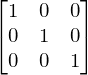

In [77]:
sp.eye(3)

Matriz de ceros

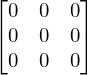

In [78]:
sp.zeros(3)

Matriz de unos

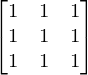

In [79]:
sp.ones(3)

Matriz diagonal

In [28]:
sp.diag(-3, 1, 6,sp.eye(2),sp.I) # sp.diag(elementos de la diagonal)

⎡-3  0  0  0  0  0⎤
⎢                 ⎥
⎢0   1  0  0  0  0⎥
⎢                 ⎥
⎢0   0  6  0  0  0⎥
⎢                 ⎥
⎢0   0  0  1  0  0⎥
⎢                 ⎥
⎢0   0  0  0  1  0⎥
⎢                 ⎥
⎣0   0  0  0  0  ⅈ⎦

También es posible incluir variables en una matriz.

In [33]:
x, y = sp.symbols('x, y')

C = sp.Matrix([[-x, -y, x],
               [x**2, 0, sp.exp(-x*y)],
               [y, 2*x + y, 0]])

C

⎡-x    -y       x  ⎤
⎢                  ⎥
⎢ 2            -x⋅y⎥
⎢x      0     ℯ    ⎥
⎢                  ⎥
⎣y   2⋅x + y    0  ⎦

In [34]:
A + C

⎡-x - 2    -y - 4       x + 2  ⎤
⎢                              ⎥
⎢ 2                        -x⋅y⎥
⎢x  - 2       1       2 + ℯ    ⎥
⎢                              ⎥
⎣y + 4   2⋅x + y + 2      5    ⎦

In [35]:
C.det()

In [36]:
sp.simplify(C**(-1))

⎡                                                                           x⋅
⎢                 -(2⋅x + y)                                   x⋅(2⋅x + y)⋅ℯ  
⎢─────────────────────────────────────────────     ───────────────────────────
⎢ 2  2  x⋅y   ⎛               2⎞ ⎛ 2  x⋅y    ⎞        4  x⋅y    3    x⋅y      
⎢x ⋅y ⋅ℯ    + ⎝x⋅(2⋅x + y) - y ⎠⋅⎝x ⋅ℯ    + 1⎠     2⋅x ⋅ℯ    + x ⋅y⋅ℯ    + 2⋅x
⎢                                                                             
⎢                                                                       x⋅y   
⎢                      y                                          -x⋅y⋅ℯ      
⎢   ───────────────────────────────────────        ───────────────────────────
⎢      4  x⋅y    3    x⋅y      2          2           4  x⋅y    3    x⋅y      
⎢   2⋅x ⋅ℯ    + x ⋅y⋅ℯ    + 2⋅x  + x⋅y - y         2⋅x ⋅ℯ    + x ⋅y⋅ℯ    + 2⋅x
⎢                                                                             
⎢               2            x⋅y                    

## Ejercicio 1: Matriz de rotación (1)

1. Definir la matriz de rotación alrededor del eje $z$

$$
R = 
\begin{pmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

2. Verificar que $\det R = 1$
3. Hallar $R^{-1}$.
4. Hallar $R^T$ y verificar que $R^T R = 1$. Esto significa que $R$ es una matriz ortogonal.

In [46]:
theta = sp.symbols('theta')

R = sp.Matrix([[sp.cos(theta),-sp.sin(theta),0],
             [sp.sin(theta),sp.cos(theta),0],
             [0,0,1]])
R

⎡cos(θ)  -sin(θ)  0⎤
⎢                  ⎥
⎢sin(θ)  cos(θ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [43]:
sp.simplify(R.det())

In [50]:
R_inv = R**(-1)
R_inv = sp.simplify(R_inv)
R_inv

⎡cos(θ)   sin(θ)  0⎤
⎢                  ⎥
⎢-sin(θ)  cos(θ)  0⎥
⎢                  ⎥
⎣   0       0     1⎦

In [52]:
R_tra = R.T
R_tra

⎡cos(θ)   sin(θ)  0⎤
⎢                  ⎥
⎢-sin(θ)  cos(θ)  0⎥
⎢                  ⎥
⎣   0       0     1⎦

In [54]:
sp.simplify(R_tra*R)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [55]:
R_inv == R_tra

True

## Autovalores y autovectores

En general, al multiplicar una matriz $A$ por un vector $\mathbf{v}$, se obtiene un vector completamente nuevo. Sin embargo, existen ciertos vectores especiales que cambian solo por una constante

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

A los vectores $\mathbf{v}$ que cumplen esta relación, se les denomina como los __autovectores__ de $A$, mientras que a los respectivos escalares $\lambda$, como sus __autovalores__.

El cálculo de los autovalores y autovectores de una matriz es muy importante para hallar por ejemplo, las energías de un sistema cuántico o los modos normales de vibración de un sistema de osciladores, como veremos más adelante.

Autovalores

In [86]:
A.eigenvals() # autovalores, multiplicidad

La función $\texttt{eigenvals()}$ nos da los autovalores de la matriz, así como el número de veces que cada uno se repite, lo que se conoce como _multiplicidad_.

In [56]:
A.eigenvals().keys() # keys = autovalores

dict_keys([6, 3, -5])

Es posible convertir un número expresado de manera simbólica a su forma decimal.

In [58]:
B_eigenvals = list(B.eigenvals().keys())

for i in B_eigenvals:
    display(sp.N(i)) # para que no salgan tan foes

Autovectores

In [59]:
A.eigenvects() #autovalor, multiplicidad, autovector

⎡⎛       ⎡⎡-2⎤⎤⎞  ⎛      ⎡⎡-2⎤⎤⎞  ⎛      ⎡⎡1/16⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟⎥
⎢⎜-5, 1, ⎢⎢-1⎥⎥⎟, ⎜3, 1, ⎢⎢3 ⎥⎥⎟, ⎜6, 1, ⎢⎢3/8 ⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1  ⎦⎦⎠⎦

La función $\texttt{eigenvals()}$ nos da los autovectores de la matriz, así como su respectivo autovalor y multiplicidad.

Si queremos seleccionar un autovector en particular

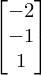

In [89]:
A.eigenvects()[0][2][0] # seleccionar el primer autovector

## Ejercicio 2: Matriz de rotación (2)

1. Hallar los autovalores de $R$.
2. Hallar los autovectores de $R$.
3. Dar una interpretación física a estos resultados.

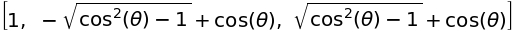

In [65]:
R_valp = list(R.eigenvals().keys())
R_valp

In [71]:
R_vecp = list()

for i in range(3):
    R_vecp.append(R.eigenvects()[i][2][0])

R_vecp

⎡     ⎡     sin(θ)     ⎤  ⎡    -sin(θ)     ⎤⎤
⎢     ⎢────────────────⎥  ⎢────────────────⎥⎥
⎢⎡0⎤  ⎢   _____________⎥  ⎢   _____________⎥⎥
⎢⎢ ⎥  ⎢  ╱    2        ⎥  ⎢  ╱    2        ⎥⎥
⎢⎢0⎥, ⎢╲╱  cos (θ) - 1 ⎥, ⎢╲╱  cos (θ) - 1 ⎥⎥
⎢⎢ ⎥  ⎢                ⎥  ⎢                ⎥⎥
⎢⎣1⎦  ⎢       1        ⎥  ⎢       1        ⎥⎥
⎢     ⎢                ⎥  ⎢                ⎥⎥
⎣     ⎣       0        ⎦  ⎣       0        ⎦⎦

**Interpretación física**

$$R \textbf{v} = \lambda \textbf{v}$$

* Si se aplica la rotación R sobre el vector [0,0,1], este no cambia (es el eje de rotación)

In [75]:
algo = list()
for i in range(3):
    algo.append(R_valp[i]*R_vecp[i])

⎡     ⎡⎛     _____________         ⎞       ⎤  ⎡ ⎛   _____________         ⎞   
⎢     ⎢⎜    ╱    2                 ⎟       ⎥  ⎢ ⎜  ╱    2                 ⎟   
⎢     ⎢⎝- ╲╱  cos (θ) - 1  + cos(θ)⎠⋅sin(θ)⎥  ⎢-⎝╲╱  cos (θ) - 1  + cos(θ)⎠⋅si
⎢     ⎢────────────────────────────────────⎥  ⎢───────────────────────────────
⎢⎡0⎤  ⎢             _____________          ⎥  ⎢             _____________     
⎢⎢ ⎥  ⎢            ╱    2                  ⎥  ⎢            ╱    2             
⎢⎢0⎥, ⎢          ╲╱  cos (θ) - 1           ⎥, ⎢          ╲╱  cos (θ) - 1      
⎢⎢ ⎥  ⎢                                    ⎥  ⎢                               
⎢⎣1⎦  ⎢         _____________              ⎥  ⎢        _____________          
⎢     ⎢        ╱    2                      ⎥  ⎢       ╱    2                  
⎢     ⎢    - ╲╱  cos (θ) - 1  + cos(θ)     ⎥  ⎢     ╲╱  cos (θ) - 1  + cos(θ) 
⎢     ⎢                                    ⎥  ⎢                               
⎣     ⎣                 0                  ⎦  ⎣     

# Problema 1: Autovalores de energía 

_Referencia:_  Zetilli, Quantum Mechanics, Problema 3.6 (p. 197) 

Los posibles valores de energía de un sistema están dados por la ecuación de Schr&ouml;dinger 

$$
\hat{H}|\psi\rangle= E|\psi\rangle,
$$

donde $\hat{H}$ es el hamiltoniano del sistema. Es decir, las posibles energías del sistema vienen a ser los autovalores del Hamiltoniano.

Para este problema, consideremos el hamiltoniano

$$
\hat{H} = E_0 
\begin{pmatrix}
0 & i & 0 \\
-i & 0 & 0 \\
0 & 0 & -1
\end{pmatrix}
$$

1. Definir el hamiltoniano $\hat{H}$.
2. Verificar que el hamiltoniano es hermítico
$$
\hat{H} = \hat{H}^\dagger
$$
3. Hallar los posibles valores de energía del sistema.
4. Hallar los autovectores de $\hat{H}$ y verificar para uno de estos que se cumple la ecuación de Schr&ouml;dinger.

Consideremos ahora que nuestro sistema se encuentra inicialmente en un estado

$$
|\psi_0 \rangle = \frac{1}{\sqrt{5}}
\begin{pmatrix}
1 - i \\
1 - i \\
1
\end{pmatrix}
$$

donde cada componente del vector indica la amplitud de probabilidad de medir cada valor de energía.

El valor esperado de la energía para un sistema dado está definido como

$$
\langle E \rangle = \langle \psi_0|\hat{H}|\psi_0 \rangle 
$$

donde el bra $\langle \psi_0|$ es la adjunta del ket $|\psi_0 \rangle$.

5. Verificar que el estado $|\psi_0\rangle $ esta normalizado
$$
\langle \psi_0|\psi_0 \rangle  = 1
$$
6. Hallar el valor esperado de la energía para el sistema. _Nota:_ esto se puede calcular como una multiplicación de matrices.

In [98]:
E_0 = sp.symbols('E_0',positive = True)

H = E_0*sp.Matrix([[0,sp.I,0],
              [-sp.I,0,0],
              [0,0,-1]])
H

⎡  0    ⅈ⋅E₀   0 ⎤
⎢                ⎥
⎢-ⅈ⋅E₀   0     0 ⎥
⎢                ⎥
⎣  0     0    -E₀⎦

In [100]:
H_conj = Dagger(H)
H_conj == H

True

In [130]:
H.eigenvals()

In [101]:
H_ener = list(H.eigenvals().keys())
H_ener

In [131]:
H.eigenvects()

⎡⎛        ⎡⎡-ⅈ⎤  ⎡0⎤⎤⎞  ⎛       ⎡⎡ⅈ⎤⎤⎞⎤
⎢⎜        ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟⎥
⎢⎜-E₀, 2, ⎢⎢1 ⎥, ⎢0⎥⎥⎟, ⎜E₀, 1, ⎢⎢1⎥⎥⎟⎥
⎢⎜        ⎢⎢  ⎥  ⎢ ⎥⎥⎟  ⎜       ⎢⎢ ⎥⎥⎟⎥
⎣⎝        ⎣⎣0 ⎦  ⎣1⎦⎦⎠  ⎝       ⎣⎣0⎦⎦⎠⎦

In [128]:
aux1 = H.eigenvects()[0][2]
aux2 = H.eigenvects()[1][2][0]

H_vecp = [aux1,aux2]
H_vecp

⎡⎡⎡-ⅈ⎤  ⎡0⎤⎤  ⎡ⅈ⎤⎤
⎢⎢⎢  ⎥  ⎢ ⎥⎥  ⎢ ⎥⎥
⎢⎢⎢1 ⎥, ⎢0⎥⎥, ⎢1⎥⎥
⎢⎢⎢  ⎥  ⎢ ⎥⎥  ⎢ ⎥⎥
⎣⎣⎣0 ⎦  ⎣1⎦⎦  ⎣0⎦⎦

In [129]:
H*H_vecp[1] == E_0*H_vecp[1]

True

In [133]:
ket = 1/sp.sqrt(5)*sp.Matrix([1-sp.I,1-sp.I,1])
ket

⎡√5⋅(1 - ⅈ)⎤
⎢──────────⎥
⎢    5     ⎥
⎢          ⎥
⎢√5⋅(1 - ⅈ)⎥
⎢──────────⎥
⎢    5     ⎥
⎢          ⎥
⎢    √5    ⎥
⎢    ──    ⎥
⎣    5     ⎦

In [138]:
bra = Dagger(ket)
bra

⎡√5⋅(1 + ⅈ)  √5⋅(1 + ⅈ)  √5⎤
⎢──────────  ──────────  ──⎥
⎣    5           5       5 ⎦

In [142]:
sp.simplify(bra*ket)

[1]

In [143]:
bra*H*ket

⎡-E₀ ⎤
⎢────⎥
⎣ 5  ⎦

# Matrices númericas

Para definir una matriz de manera numérica usamos el paquete $\texttt{numpy}$. En este paquete, las matrices (así como cualquier otro arreglo de números) se definen usando el comando $\texttt{array}$.

In [145]:
import numpy as np

In [126]:
A_num = np.array([[-2, -4, 2], 
                  [-2, 1, 2],
                  [4, 2, 5]])

A_num

array([[-2, -4,  2],
       [-2,  1,  2],
       [ 4,  2,  5]])

In [147]:
B_num = np.array([[1, 4, 3],
                  [0, -1, 2], 
                  [1, 2, 5]])

B_num

array([[ 1,  4,  3],
       [ 0, -1,  2],
       [ 1,  2,  5]])

Todas las operaciones algebraicas que se realizaron en $\texttt{sympy}$, también se pueden realizar en $\texttt{numpy}$.

In [115]:
A_num + B_num

array([[-1,  0,  5],
       [-2,  0,  4],
       [ 5,  4, 10]])

Hay q tener cuidado con la multiplicación. Si multiplicamos las matrices de la misma manera que en $\texttt{sympy}$, esta será elemento por elemento.

In [122]:
A_num*B_num

array([[ -2., -16.,   6.],
       [ -0.,  -1.,   4.],
       [  4.,   4.,  25.]])

Multiplicación de matrices

In [117]:
np.dot(A_num, B_num)

array([[ 0,  0, -4],
       [ 0, -5,  6],
       [ 9, 24, 41]])

Para realizar las operaciones propias de las matrices como obtener la matriz adjunta o inversa, se tiene que usar el paquete $\textt{linalg}$ que está dentro de $\texttt{numpy}$. 

In [125]:
np.linalg.det(A_num)

In [127]:
np.linalg.inv(A_num)

array([[-1.11111111e-02, -2.66666667e-01,  1.11111111e-01],
       [-2.00000000e-01,  2.00000000e-01, -9.25185854e-18],
       [ 8.88888889e-02,  1.33333333e-01,  1.11111111e-01]])

Autovalores y autovectores

In [128]:
np.linalg.eig(A_num)

(array([-5.,  3.,  6.]), array([[ 0.81649658,  0.53452248,  0.05842062],
        [ 0.40824829, -0.80178373,  0.35052374],
        [-0.40824829, -0.26726124,  0.93472998]]))

Los autovectores hallados están normalizados, es decir, su módulo es igual a 1.

# Problema 2: Autovalores de energía


_Referencia:_ Zetilli, Quantum Mechanics, Problema 3.11 (p. 204) 

Al igual que en el problema 1, consideremos un sistema cuyo estado inicial y hamiltoniano son respectivamente

$$
|\psi_0 \rangle = \frac{1}{5}
\begin{pmatrix}
3 \\
0 \\
4
\end{pmatrix} 
\quad
\hat{H} = 
\begin{pmatrix}
3 & 0 & 0 \\
0 & 0 & 5 \\
0 & 5 & 0
\end{pmatrix}
$$

Repetir los cálculos del problema 1, pero trabajandolo ahora de manera numérica. 

In [1]:
#solucion